In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import skimage.io as io
from copy import deepcopy

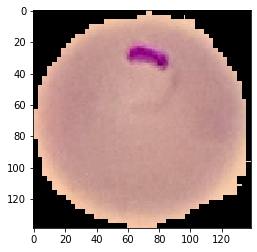

In [3]:
image = plt.imread(r'C:\Users\USER\Desktop\a.png')
plt.imshow(image)

In [12]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import data
import normalize

def main():
    pass

def fast_glcm(img, vmin, vmax, nbit, kernel_size):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w,_ = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)
    return glcm[0][0]

def fast_glcm_mean(img, vmin, vmax, nbit, ks):
    '''
    Calculate GLCM Mean
    '''
    h,w,_ = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2
    global a
    a = mean
    return mean[0][0]



def fast_glcm_std(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Standard Deviation
    '''
    h,w,_ = img.shape
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    mean = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    std2 = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            std2 += (glcm[i,j] * i - mean)**2

    std = np.sqrt(std2)
    return std[0][0]


def fast_glcm_contrast(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Contrast
    '''
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cont = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            cont += glcm[i,j] * (i-j)**2

    return cont[0][0]

def fast_glcm_variance(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Variance
    '''
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    var = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            var += glcm[i,j] * (i-a)**2
    global b
    b = var
    return var[0][0]

def fast_glcm_correlation(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Correlation
    '''
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    cor = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            cor += glcm[i,j] * (((i-a)*(j-a))/b)
    return cor[0][0]

def fast_glcm_dissimilarity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Dissimilarity
    '''
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    diss = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            diss += glcm[i,j] * np.abs(i-j)

    return diss[0][0]


def fast_glcm_homogeneity(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Homogeneity
    '''
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    homo = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            homo += glcm[i,j] / (1.+(i-j)**2)

    return homo[0][0]


def fast_glcm_ASM(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Angular Second Moment
    '''
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return asm[0][0]

def fast_glcm_ene(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Energy
    '''    
    h = img.shape[0]
    w = img.shape[1]
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    asm = np.zeros((h,w), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            asm  += glcm[i,j]**2

    ene = np.sqrt(asm)
    return ene[0][0]

def fast_glcm_max(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Max
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    max_  = np.max(glcm, axis=(0,1))
    return max_


def fast_glcm_entropy(img, vmin=0, vmax=255, nbit=8, ks=5):
    '''
    Calculate GLCM Entropy
    '''
    glcm = fast_glcm(img, vmin, vmax, nbit, ks)
    pnorm = glcm / np.sum(glcm, axis=(0,1)) + 1./ks**2
    ent  = np.sum(-pnorm * np.log(pnorm), axis=(0,1))
    return ent


if __name__ == '__main__':
    main()

    nbit = 8
    ks = 5
    mi, ma = 0, 255
    theta = [0, 1]
    img = cv2.imread(r'C:\Users\USER\Desktop\b.png')
    img.transpose(2,0,1).reshape(-1,img.shape[1])
    h = img.shape[0]
    w = img.shape[1]
    #img[:,:w//2] = img[:,:w//2]//2+127
    glcm_mean = fast_glcm_mean(img, mi, ma, nbit, ks)
    print("Mean =", glcm_mean)
    print("Standard Deviation =", fast_glcm_std(img))
    print("Contrast =", fast_glcm_contrast(img))
    print("Variance =",fast_glcm_variance(img))
    print("Dissimilarity =", fast_glcm_dissimilarity(img))
    print("Homogeneity =", fast_glcm_homogeneity(img))
    print("Angular Second Moment =", fast_glcm_ASM(img))
    print("Correlation =",fast_glcm_correlation(img))
    print("Energy =",fast_glcm_ene(img))
    print("Max GLCM =", fast_glcm_max(img))
    print("Entropy =", fast_glcm_entropy(img))

Mean = 87.5
Standard Deviation = 458.25757
Contrast = 16800.0
Variance = 11297990.0
Dissimilarity = 4200.0
Homogeneity = 481.23663
Angular Second Moment = 40000.0
Correlation = 0.9992574
Energy = 200.0
Max GLCM = 25.0
Entropy = 2173.543
